In [8]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.spatial import distance
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
dfx = pd.read_csv("PLIC-milano-processed.csv", sep=';')
dfx = dfx.select_dtypes(exclude=['object', 'float64', 'float32', 'float'])
dfx = dfx.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1', 'cod pcs'], axis=1) #
dfx = dfx.dropna(how='any', axis=1)

In [3]:
dfx = dfx[dfx.columns[dfx.max()<=1]]
dfx.describe()

,abdomen,angina,remote angina,antiaggregators,antidiabetics,antihypertensives,respiratory system,arrhythmia,major arrhythmias,arteriopathyortic,...,remote decompensation,gender,NS blows,statins,steatosis,TIA,Remote TIA,thyroidpetto,thyroid nodules,venous thrombosis
count,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,...,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000
mean,0.010035,0.007612,0.024221,0.135813,0.037543,0.359170,0.012111,-0.244810,-0.748270,0.007093,...,0.003633,0.589619,-0.653114,0.220242,0.017474,0.009862,0.020761,0.086159,-0.005017,0.013495
std,0.112713,0.086924,0.153749,0.342620,0.190105,0.479799,0.118502,0.441919,0.438013,0.083930,...,0.060172,0.491945,0.653963,0.414446,0.131041,0.098823,0.142596,0.363381,0.210000,0.118352
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.750000,0.000000,...,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X = dfx.values
X.shape

(5780, 82)

In [12]:
hamming = distance.pdist(X, 'hamming')*82
#np.histogram(hamming, np.arange(83))
freq = np.bincount(hamming.astype(int))
print(freq)

[ 174414  539115  921593 1191727 1317950 1289221 1156797  963258  775712
  606548  463719  349076  281732  291911  391832  563150  712149  799503
  803702  743001  636866  515805  390344  281986  194152  128659   80686
   49933   31066   19844   13222    7916    5506    3839    2471    1492
     786     337     150      69      38      19       7       2       5]


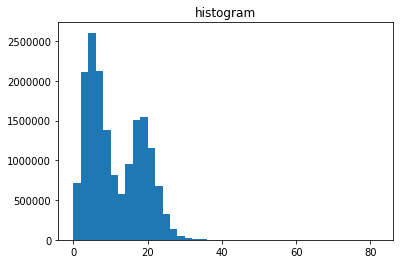

In [11]:
plt.hist(hamming, bins = np.arange(0, 84, 2)) 
plt.title("histogram") 
plt.show()